# <b>Fishchenko Tamara Alekseevna 246-1<b>
## Project based on 'Waiter's Tips Dataset'

In [147]:
# importing necessary libraries
import opendatasets as od 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
import warnings
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')

od.download( 
	"https://www.kaggle.com/datasets/aminizahra/tips-dataset")

Skipping, found downloaded files in "./tips-dataset" (use force=True to force download)


After importing all necessary libraries and downloading the dataset, we need to read our csv file.

In [149]:
csvFile = pd.read_csv('tips.csv')
print(csvFile)

     total_bill   tip     sex smoker   day    time  size  price_per_person  \
0         16.99  1.01  Female     No   Sun  Dinner     2              8.49   
1         10.34  1.66    Male     No   Sun  Dinner     3              3.45   
2         21.01  3.50    Male     No   Sun  Dinner     3              7.00   
3         23.68  3.31    Male     No   Sun  Dinner     2             11.84   
4         24.59  3.61  Female     No   Sun  Dinner     4              6.15   
..          ...   ...     ...    ...   ...     ...   ...               ...   
239       29.03  5.92    Male     No   Sat  Dinner     3              9.68   
240       27.18  2.00  Female    Yes   Sat  Dinner     2             13.59   
241       22.67  2.00    Male    Yes   Sat  Dinner     2             11.34   
242       17.82  1.75    Male     No   Sat  Dinner     2              8.91   
243       18.78  3.00  Female     No  Thur  Dinner     2              9.39   

             Payer Name         CC Number Payment ID  
0    Chr

In [150]:
csvFile

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3506806155565404,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4375220550950,Sat17


## **Feature description**:  
- **total_bill** - how much was spent in total (in dollars)  
- **tip** - how much was left as a tip (in dollars)  
- **sex** - sex  
- **smoker** - 'Yes' or 'No' variable  
- **day** - day of the week  
- **time** - 'Lunch' or 'Dinner' variable  
- **size** - hwo many people were in the group  
- **price_per_person** - how much is paid per person  
- **Payer Name** - the name of a payer  
- **CC Number** - CC Number  
- **Payment ID** - Payment ID

Overall, there are 11 columns and 244 rows in our dataset.

## **Descriptive statistics**:

We will use the describe() method which returns description of the data in the DataFrame.

The description will contain these information for each column:

- **count** - the number of not-empty values  
- **mean** - the average (mean) value  
- **std** - the standard deviation  
- **min** - the minimum value  
- **25%** - the 25% percentile*  
- **50%** - the 50% percentile* (the same as a median)  
- **75%** - the 75% percentile*  
- **max** - the maximum value  

***Percentile** - how many of the values are less than the given percentile.

**Mean**: The "average" number; found by adding all data points and dividing by the number of data points.  
**Median**: The middle number; found by ordering all data points and picking out the one in the middle (or if there are two middle numbers, taking the mean of those two numbers).  
**Standard deviation**: a measure of the amount of variation of the values of a variable about its mean.

In [155]:
stats = csvFile.groupby('sex')['tip'].describe()
stats

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0


In [156]:
stats = csvFile.groupby('smoker')['total_bill'].describe()
stats

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,19.188278,8.255582,7.25,13.325,17.59,22.755,48.33
Yes,93.0,20.756344,9.832154,3.07,13.420,17.92,26.860,50.81


In [157]:
stats = csvFile.groupby('time')['tip'].describe()
stats

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Dinner,176.0,3.102670,1.436243,1.00,2.0,3.00,3.6875,10.0
Lunch,68.0,2.728088,1.205345,1.25,2.0,2.25,3.2875,6.7


## **Data clearance**:

We need to check out data for any NaN values, as well as checking if columns have the correct data type. In case of any NaN values, we either fill in with mean or can delete the line.

In [159]:
csvFile.describe()  # basic statistics of the numerical columns
csvFile.info()  # checking for data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


In [160]:
csvFile.isna().sum()  # how many missing values there are in each column

total_bill          0
tip                 0
sex                 0
smoker              0
day                 0
time                0
size                0
price_per_person    0
Payer Name          0
CC Number           0
Payment ID          0
dtype: int64

We can see that there are no null parameters in any columns (all zeroes). Moreover, all data types are suitable for the given data in columns: 3 float64 (total_bill, tip, price_per_person), 2 int64 (size, CC Number) and 6 objects (sex, smoker, day, time, Payer Name, Payment ID).

### Deleting columns:

However, there are some columns which are not useful for our task, such as "price_per_person" (can be easily calculated by dividing "total_bill" by "size"), "Payer Name" (we will use "sex" column), "CC Number", "Payment ID". 

In [163]:
# list of unnecessary columns
columns_to_drop = ["price_per_person","Payer Name","CC Number","Payment ID"]

# using the intersection of the columns to drop only existing ones
existing_columns_to_drop = [col for col in columns_to_drop if col in csvFile.columns]

# dropping the existing columns
csvFile.drop(columns=existing_columns_to_drop, inplace=True)

csvFile

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## **Data transformation:**
### Adding a new column:

For convenience, let's add a new column called "tip_percentage", which calculates the percentage of tip from the total bill, which we will later use for constructing a graph.

In [165]:
# new column with percentage of tip from the total bill
csvFile['tip_percentage'] = round((csvFile['tip'] / csvFile['total_bill']) * 100, 2)

csvFile

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.39
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.36
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.82
242,17.82,1.75,Male,No,Sat,Dinner,2,9.82


## **Result of data clearance and transformation:**

As it can be seen, there were no replacements of any NaN values in the dataset but 4 columns ("price_per_person", "Payer Name", "CC Number", "Payment ID") were deleted due to their irrelevance in further data analysis, while 1 column ("tip_percentage") was added for future usage.

## **Data analysis and visualization:**

### **Hypothesises:**
Before any analysis, let's make some predictions about our dataset, which we will check in our following plots.
1. Non-smokers pay more per meal than smokers.
2. People go to cafes in smaller groups.
3. The higher the bill is, the higher is tip_percentage from overall bill.

### **First plot:**


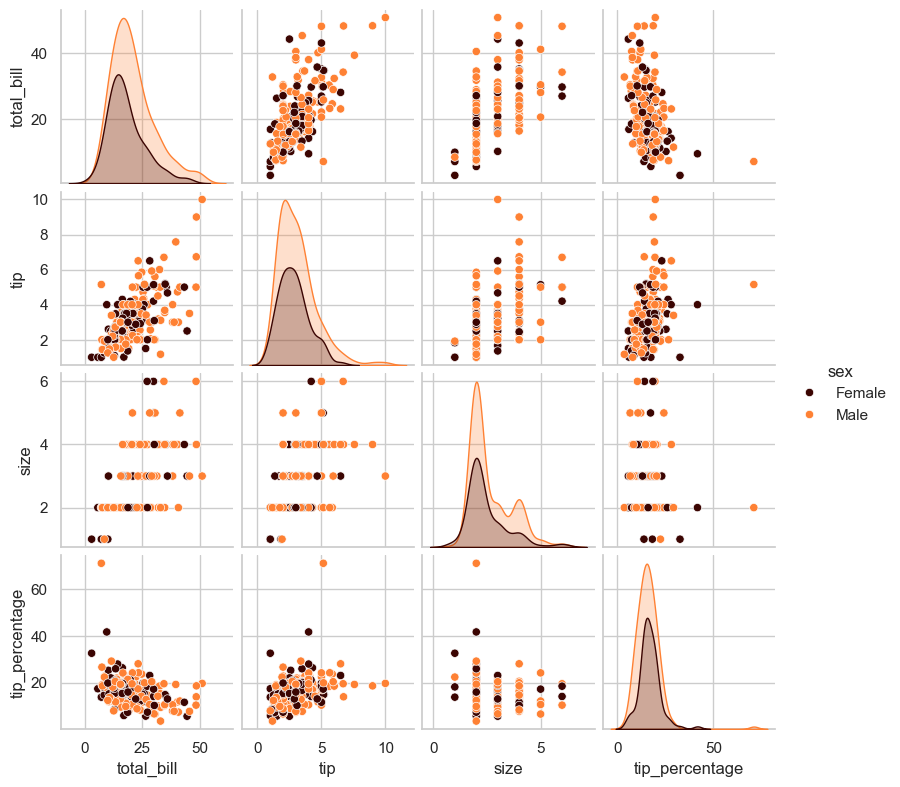

In [170]:
custom_palette = {"Female": "#3B0502", "Male": "#FE8134"}
# plotting pairwise relationships in a dataset
pp = sns.pairplot(csvFile, hue = 'sex', palette=custom_palette, height=2)
plt.show()

### **Result:**
It is possible to conclude that in general men pay more for total bill and tips compared to women, as well as groups of bigger sizes are paid by men.

### **Second plot:**

Sns.catplot() creates a bar plot showing the average total bill (y="total_bill") for each day (x="day") of the week, but split by smoking status (hue="smoker"). It only shows the mean value and confidence interval within each nested category. In this graph light blue shows non-smokers and mediums late blue - smokers. We use only four days of the weeks as there is no data on Monday, Tuesday and Wednesday.

#### **Hypothesis 1:**
Non-smokers pay more per meal than smokers.

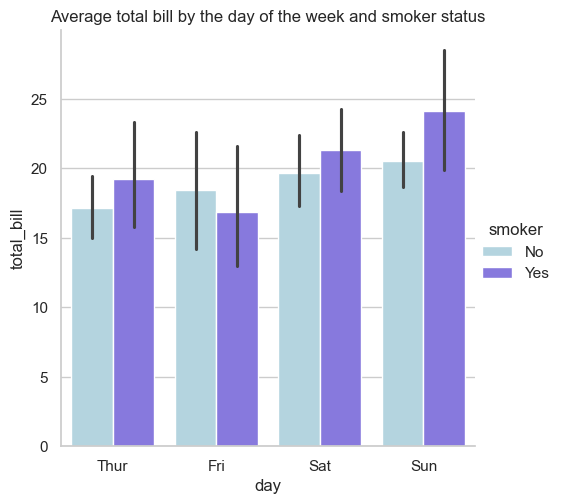

In [175]:
ordered_days = ["Thur", "Fri", "Sat", "Sun"]  # sorted week
custom_palette = {"Yes": "mediumslateblue", "No": "lightblue"}  # used colors
sns.catplot(data=csvFile, kind="bar", x="day", y="total_bill", hue="smoker", order=ordered_days, palette=custom_palette, height=5, aspect=1.)
plt.title("Average total bill by the day of the week and smoker status")
plt.show()

### **Result:**
From this plot we can see that our first hypothesis about non-smokers paying more was partially incorrect, except for Friday.

### **Third plot:**

In [178]:
# creating set to find how groups of n size there are
groups = csvFile['size'].value_counts().to_dict()
groups

{2: 156, 3: 38, 4: 37, 5: 5, 1: 4, 6: 4}

#### **Hypothesis 2:**
People go to cafes in smaller groups.

Now using this set let's make a pie chart which shows percentages of groups consisiting of n people. We will use matplotlib.pyplot.

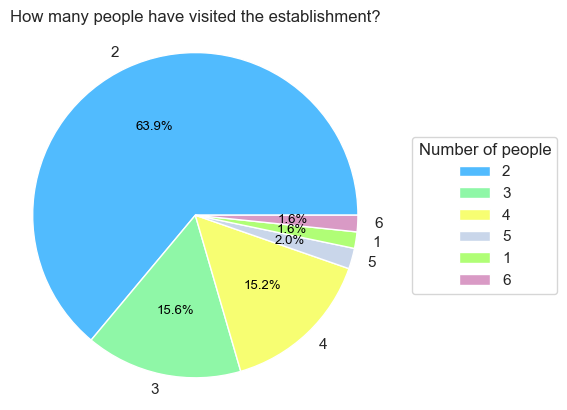

In [181]:
labels = groups.keys()
sizes = groups.values()
fig, ax = plt.subplots()


# ax.pie - plot a pie chart
# wedges - each customizable wedge corresponds to a slice of the pie
# texts - labels of each wedge
# autotexts - percentage values displayed on each wedge
wedges, texts, autotexts = ax.pie(sizes,
                                  labels=labels,
                                  colors=['#51BBFE', '#8FF7A7', '#F7FE72', '#C9D6EA', '#B0FE76', '#D99AC5'],
                                  autopct='%1.1f%%',
                                  radius=1.1)

# using wedges in the legend
ax.legend(wedges, labels,
          title="Number of people",
          loc="center right",
          bbox_to_anchor=(1, 0, 0.5, 1))

# customize percentages
plt.setp(autotexts, size=9.5, color='black')

ax.set_title("How many people have visited the establishment?")
plt.show()

### **Result:**
As it can be seen from the pie chart, the majority of the visitors come in groups of two people (63.9%), followed 3, 4, 5, 1, 6 people, accounting for 15.6%, 15.2%, 2.0% and 1.6% correspondingly. So, our second hypothesis turned out to be true.

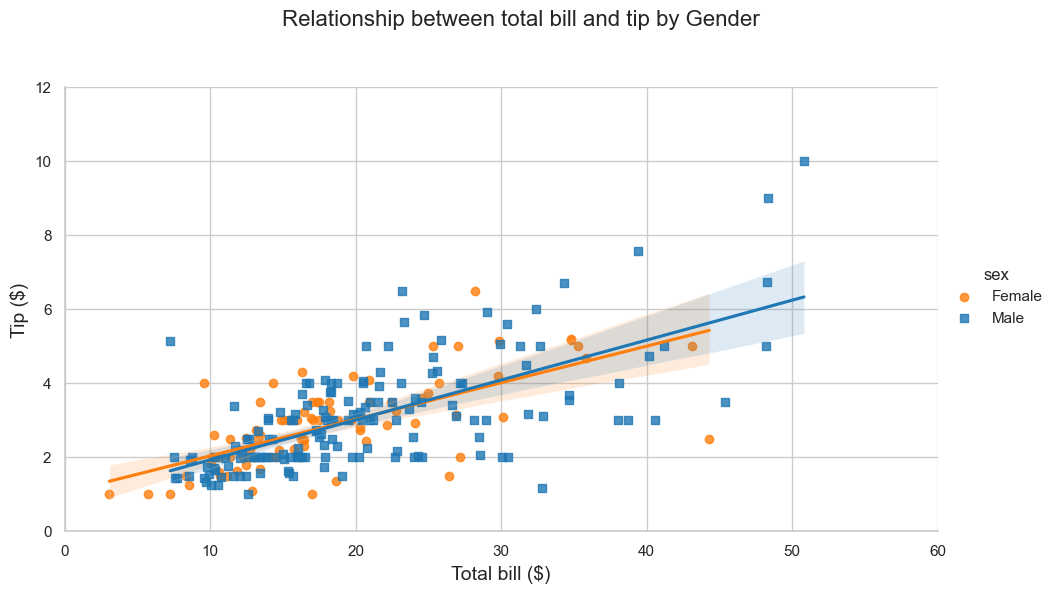

In [183]:
sns.set(style="whitegrid")
custom_palette = {"Female": "#ff7f0e", "Male": "#1f77b4"}

# multi-plot grid for plotting conditional relationships
# creating the facetGrid with gender-based columns
g = sns.lmplot(
    x='total_bill',
    y='tip',
    data=csvFile,
    hue='sex', 
    palette=custom_palette, 
    aspect=1.6, height=6, 
    markers=["o", "s"])

# naming axes
g.set_axis_labels('Total bill ($)', 'Tip ($)', fontsize=14)
# creating the subtitle
g.fig.suptitle('Relationship between total bill and tip by Gender', fontsize=16)

# limiting the axes to make the graph clearer
g.set(ylim=(0, 12), xlim=(0, 60))

# adding a regression line (this is handled by `lmplot` automatically)
# it reflects the best-fit connection in a dataset between independent and dependent variables.
# total bill - independent variable
# tips - dependent variable
# the main purpose - estimating the value of the dependent variable based on the values of one or more independent variables.
plt.subplots_adjust(top=0.85)  # Adjust the title to avoid overlap

# Show the plot
plt.show()


### **More detailed overview using correlation:**

#### **Hypothesis 3:**
The higher the bill is, the higher is tip_percentage from overall bill.

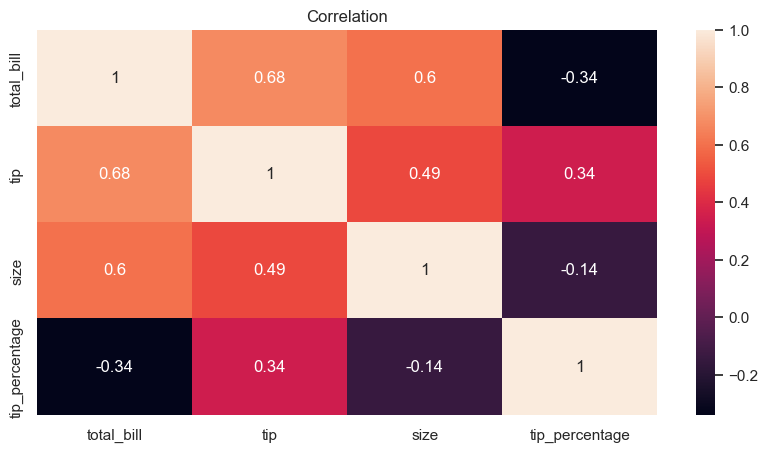

In [186]:
plt.figure(figsize=(10,5))
# plotting rectangular data as a color-encoded matrix
# using 'number' for selecting all numeric types
sns.heatmap(csvFile.select_dtypes('number').corr(),annot=True)
plt.title('Correlation');

### **Result:**
1. As we can see, total_bill and tip_percentage have negative correlation, so we can assume that our third hypothesis was wrong. Thus, when the overall bill is high, the percentage of tips are low.
2. However, the higher the total bill, the more tips are left, as the correlation is equal to 0.68.

### **More detailed overview on average tip percentage by day and sex:**

We will construct 3D graph for our analysis using Axes3D from mpl_toolkits.mplot3d. 2D collection types are converted to a 3D version by modifying the object and adding z coordinate information.

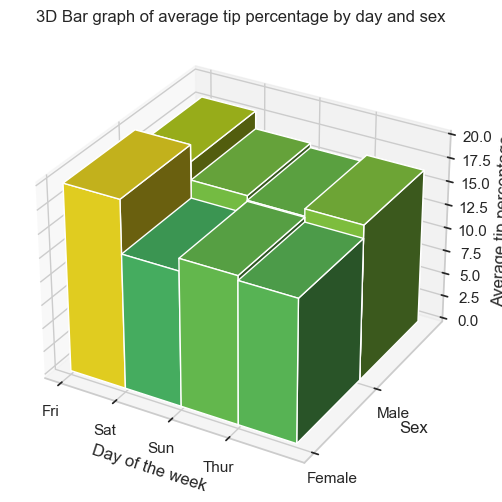

In [190]:
# grouping data by 'day' and 'sex', and calculating the average tip percentage
csvFile_grouped = csvFile.groupby(['day', 'sex'])['tip_percentage'].mean().unstack()

# creating a figure and a 3D axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# preparing the data
days = csvFile_grouped.index
sexes = csvFile_grouped.columns
_x, _y = np.meshgrid(range(len(days)), range(len(sexes)))

# flattening the meshgrid for easier plotting
x_pos = _x.flatten()
y_pos = _y.flatten()
z_pos = np.zeros_like(x_pos)

# getting the heights (tip percentages)
tip_percentages = csvFile_grouped.values.flatten()

# width of each bar
dx = np.ones_like(x_pos)
# depth of each bar
dy = np.ones_like(y_pos)
# height of each bar
dz = tip_percentages

# plotting the bars
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=plt.cm.viridis(tip_percentages / max(tip_percentages)))

# setting labels and title
ax.set_xlabel('Day of the week')
ax.set_ylabel('Sex')
ax.set_zlabel('Average tip percentage')
ax.set_title('3D Bar graph of average tip percentage by day and sex')

# customizing x and y tick labels to show the days and sexes
ax.set_xticks(range(len(days)))
ax.set_xticklabels(days)
ax.set_yticks(range(len(sexes)))
ax.set_yticklabels(sexes)

plt.show()


### **Result:**
1. As it can be seen, the values almost every day are approximately the same, with their difference being no more than about 1.5%, but in general, men pay more except for Friday.
2. The day when both men and women leave more tips is Friday.

## **Hypothesis results:**
1. Non-smokers pay more per meal than smokers.  
   This turned out to be partially true.
2. People go to cafes in smaller groups.  
   This is true.
3. The higher the bill is, the higher is tip_percentage from overall bill.
   This is false.